In [1]:
import vice
import arya
import matplotlib.pyplot as plt
import pandas as pd
from surp import ViceModel
import numpy as np

/astro/dboyea/.local/lib/python3.11/site-packages/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
ls ../../models/fiducial_run

coofe_gas.pdf  log.out         ofefeh.pdf          stars.csv
cooh_gas.pdf   milkyway.vice/  onezonemodel.vice/  stars_gaussian_walks.dat
cooh.pdf       model.json      params.toml         yield_params.toml


In [14]:
walks = pd.read_csv("../../models/fiducial_run/stars_gaussian_walks.dat") # requires a bit of memory

In [15]:
t_end = np.max(walks.t)

In [16]:
t_end

nan

In [17]:
walks

,N,t,R,zone


In [7]:
walks.set_index(["N", "t"], inplace=True) # multiindex makes this much easier...

In [7]:
df_end = walks.xs(t_end, level="t")

In [8]:
df_end.index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       132649, 132650, 132651, 132652, 132653, 132654, 132655, 132656, 132657,
       132658],
      dtype='int64', name='N', length=132000)

In [9]:
Ns = df_end.index.values # last slice contains every value

In [10]:
t_birth = np.empty(len(Ns))
Ri = np.zeros(len(Ns))
Rf = np.zeros(len(Ns))
for i, n in enumerate(Ns):
    print(f"{n} / {Ns[-1]}", end="\r")
    ws = walks.loc[n, :]
    t_birth[i] = ws.index[0]
    Rf[i] = ws.R[t_end]
    Ri[i] = ws.R[t_birth[i]]
    
dR = Rf - Ri

Text(0, 0.5, 'density')

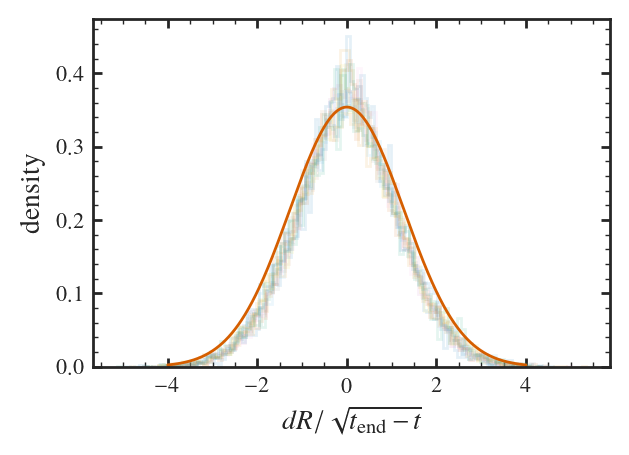

In [11]:
for t in np.arange(0, 13.0):
    dt = 0.5
    filt = t_birth > t - dt
    filt &= t_birth < t + dt
    plt.hist(dR[filt]/np.sqrt(13.2 - t_birth[filt]), 100, histtype="step", density=True, alpha=0.1)
    
x = np.linspace(-4, 4, 1000)
σ = 1.27
y = 1/np.sqrt(2*np.pi * σ) * np.exp(-x**2 / (2*σ**2))
plt.plot(x, y)
plt.xlabel(r"$dR / \sqrt{t_{\rm  end} - t}$")
plt.ylabel("density")

all time bins appear to be well approximated by the gaussian (yay). The overabundance at 0 is likely due to boundry conditions (r=0 and r=20).

Text(0, 0.5, 'dr')

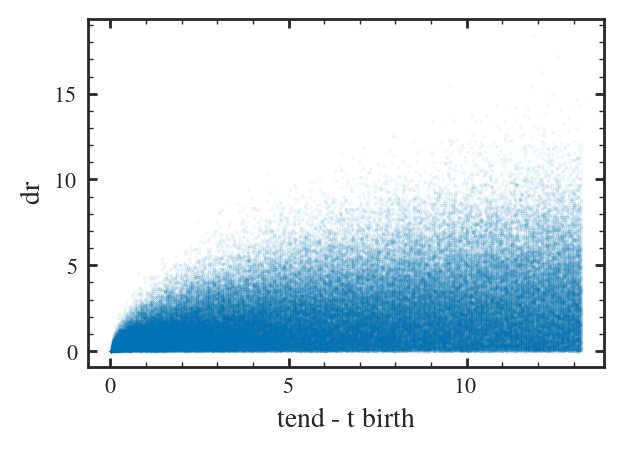

In [12]:
plt.scatter(13.2 - t_birth, np.abs(dR), s=0.05, alpha=0.1)
plt.xlabel("tend - t birth")
plt.ylabel('dr')

In [13]:
z0 = 2
dz = 0.1
filt = Ri > z0 - dz
filt &= Ri <= z0 + dz

In [14]:
idx = Ns[filt]

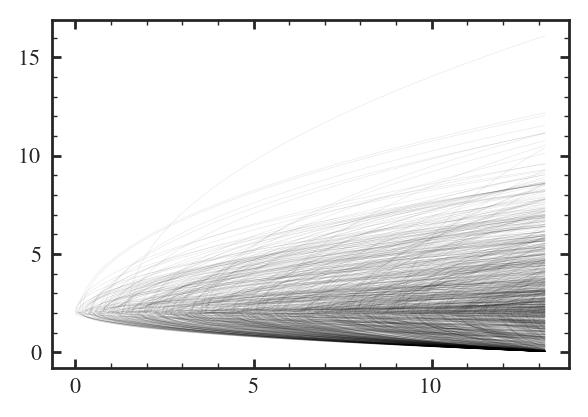

In [15]:
for N in idx:
    w = walks.loc[N, :]
    plt.plot(w.index, w.R, lw=0.2, alpha=0.1, color="k")
    


In [16]:
mig = vice.toolkit.gaussian.gaussian_stars(np.linspace(0, 20, 10))

In [17]:
a = [mig._gaussian_stars__c_version.delta_R(13) for i in range(1000)]

In [18]:
mig.get_r_birth(34)

16.136574029365203

(array([ 1.,  1.,  3.,  1.,  1.,  0.,  5.,  3.,  7., 12.,  9., 15., 10.,
        16., 22., 31., 29., 19., 34., 39., 43., 34., 40., 41., 39., 40.,
        53., 47., 50., 39., 55., 26., 40., 29., 39., 18., 19., 21., 14.,
        15.,  8.,  7., 12.,  3.,  4.,  3.,  1.,  1.,  0.,  1.]),
 array([-13.89736753, -13.3474811 , -12.79759467, -12.24770824,
        -11.69782181, -11.14793539, -10.59804896, -10.04816253,
         -9.4982761 ,  -8.94838968,  -8.39850325,  -7.84861682,
         -7.29873039,  -6.74884396,  -6.19895754,  -5.64907111,
         -5.09918468,  -4.54929825,  -3.99941182,  -3.4495254 ,
         -2.89963897,  -2.34975254,  -1.79986611,  -1.24997969,
         -0.70009326,  -0.15020683,   0.3996796 ,   0.94956603,
          1.49945245,   2.04933888,   2.59922531,   3.14911174,
          3.69899817,   4.24888459,   4.79877102,   5.34865745,
          5.89854388,   6.4484303 ,   6.99831673,   7.54820316,
          8.09808959,   8.64797602,   9.19786244,   9.74774887,
         10.

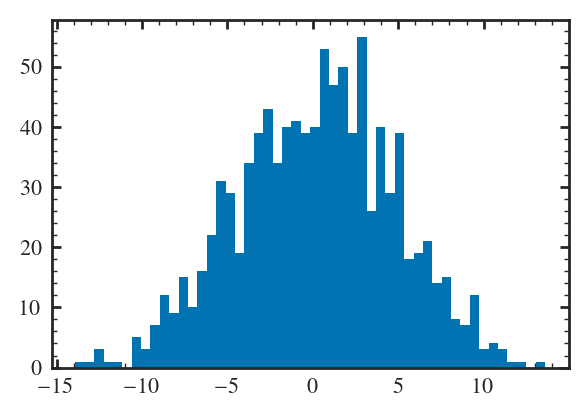

In [19]:
plt.hist(a)